In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
# The default input size for this model is 224x224.
IMAGE_SIZE = [224, 224]

In [ ]:
train_path = '/content/drive/My Drive/Thesis Fall 2020/Datasets/Alzheimer_s Dataset/train'
valid_path = '/content/drive/My Drive/Thesis Fall 2020/Datasets/Alzheimer_s Dataset/test'

In [ ]:
resnet = ResNet50(input_shape=IMAGE_SIZE+[3], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
for layer in resnet.layers:
  layer.trainable = False

In [ ]:
#To get the number of classes

folders = glob('/content/drive/My Drive/Thesis Fall 2020/Datasets/Alzheimer_s Dataset/train/*')

In [ ]:
len(folders)

4

In [ ]:
folders

['/content/drive/My Drive/Thesis Fall 2020/Datasets/Alzheimer_s Dataset/train/MildDemented',
 '/content/drive/My Drive/Thesis Fall 2020/Datasets/Alzheimer_s Dataset/train/ModerateDemented',
 '/content/drive/My Drive/Thesis Fall 2020/Datasets/Alzheimer_s Dataset/train/VeryMildDemented',
 '/content/drive/My Drive/Thesis Fall 2020/Datasets/Alzheimer_s Dataset/train/NonDemented']

In [ ]:
x = Flatten()(resnet.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
prediction

<tf.Tensor 'dense/Softmax:0' shape=(None, 4) dtype=float32>

In [ ]:
model = Model(inputs=resnet.input, outputs=prediction)

model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# IMAGE AUGMENTATION:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Thesis Fall 2020/Datasets/Alzheimer_s Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Thesis Fall 2020/Datasets/Alzheimer_s Dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 5128 images belonging to 4 classes.
Found 590 images belonging to 4 classes.


In [ ]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
161/161 [==============================] - 4086s 25s/step - loss: 1.7777 - accuracy: 0.4561 - val_loss: 2.1298 - val_accuracy: 0.5085
Epoch 2/10
161/161 [==============================] - 80s 495ms/step - loss: 1.4591 - accuracy: 0.4899 - val_loss: 1.0162 - val_accuracy: 0.5220
Epoch 3/10
161/161 [==============================] - 79s 493ms/step - loss: 1.3737 - accuracy: 0.5096 - val_loss: 1.4904 - val_accuracy: 0.5085
Epoch 4/10
161/161 [==============================] - 81s 501ms/step - loss: 1.4139 - accuracy: 0.5226 - val_loss: 1.5711 - val_accuracy: 0.5051
Epoch 5/10
161/161 [==============================] - 80s 495ms/step - loss: 1.1526 - accuracy: 0.5417 - val_loss: 2.3390 - val_accuracy: 0.3492
Epoch 6/10
161/161 [==============================] - 79s 491ms/step - loss: 1.2574 - accuracy: 0.5439 - val_loss: 1.0539 - val_accuracy: 0.4847
Epoch 7/10
161/161 [==============================] - 

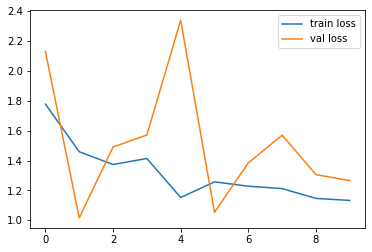

<Figure size 432x288 with 0 Axes>

In [ ]:
# LOG loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

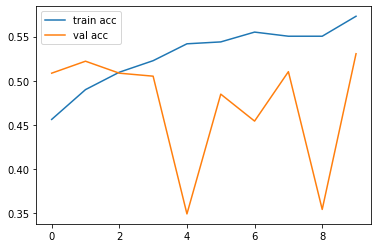

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')